In [40]:
import matplotlib.pyplot as plt
import wntr
import wntr.network.controls as controls
import sqlite3
import csv
import time
import pandas as pd
import statistics

## MiniCPS and WNTR simulation. No attack
The objective is to show the differences between the two simulations to pinpoint the cause of the difference in the behavior when MiniCPS is used. 
The tests show that this difference is present when "demand driven" or "pressure driven" simulation is used. In addition, the difference is cumulative. We tested for this by running another simulation for two weeks. The behavior of the pumps is almost the same and the time where the MiniCPS or WNTR actuates the pump only differs by 1 iteration. The first time a pump changes state is around iteration 100, which is also the same moment when the behavior of the two systems starts to differ. 

In [78]:
no_minicps_data = pd.read_csv('no_minicps_pdd.csv')
pressure_driven_no_attack = pd.read_csv('experiment_data/pressure_driven/no_attack/physical_process.csv')
demand_driven_no_attack = pd.read_csv('experiment_data/demand_driven/no_attack/physical_process.csv')

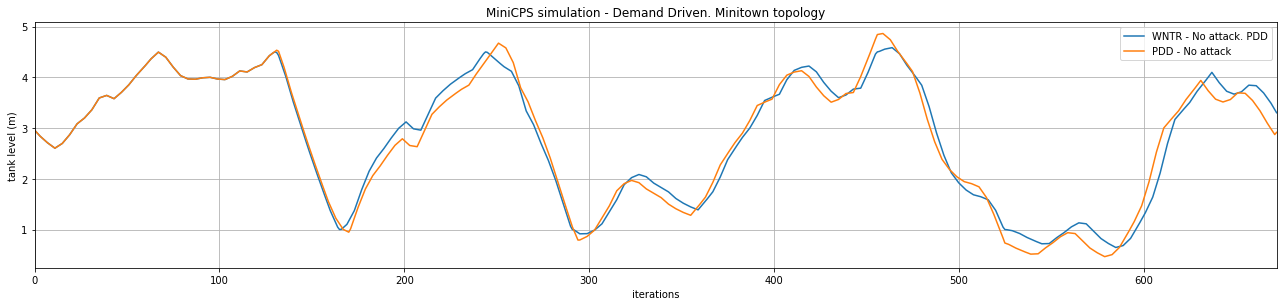

In [79]:
dd = plt.subplot(2,1,1)
no_minicps_data["TANK_LEVEL"].plot(label='WNTR - No attack. PDD', ax=dd)
pressure_driven_no_attack["TANK_LEVEL"].plot(label='PDD - No attack', ax=dd)
plt.title("MiniCPS simulation - Demand Driven. Minitown topology")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)


## Difference over time 

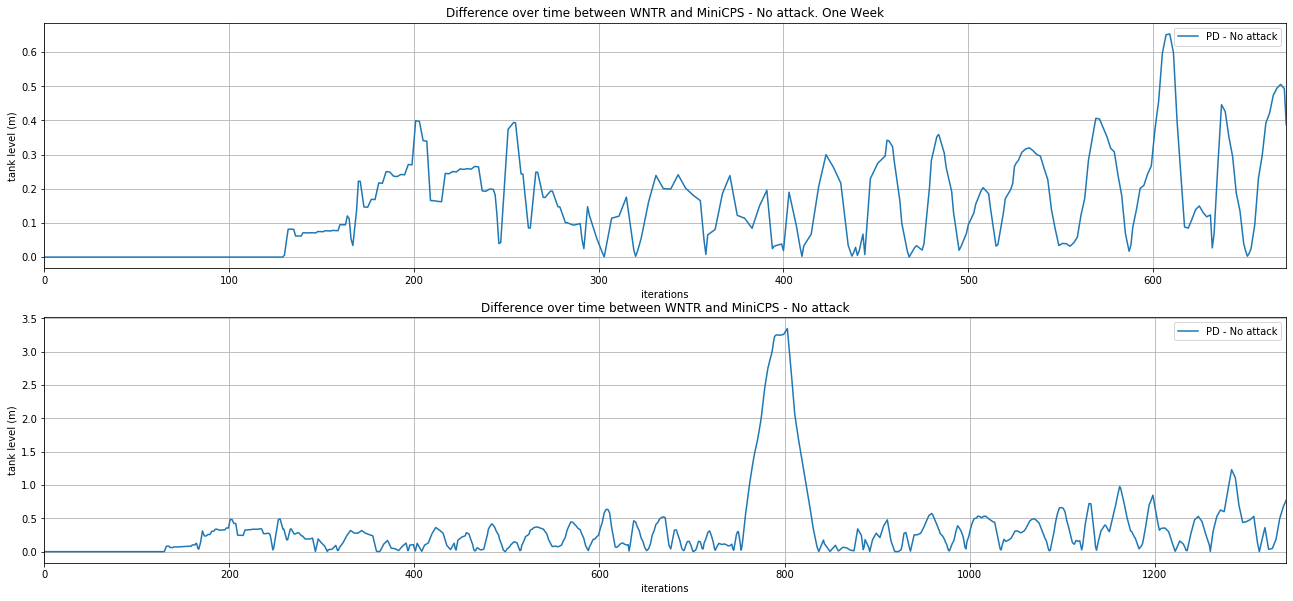

In [51]:
pressure_driven_diff_minicps_wntr_no_attack = []
for i in range((len(no_minicps_data['TANK_LEVEL']))):
    pressure_driven_diff_minicps_wntr_no_attack.append(abs ( no_minicps_data['TANK_LEVEL'][i] - pressure_driven_no_attack['TANK_LEVEL'][i]  ) )

dd = plt.subplot(2,1,1)
plt.plot(pressure_driven_diff_minicps_wntr_no_attack, label="PD - No attack")
plt.title("Difference over time between WNTR and MiniCPS - No attack. One Week")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.xlim(left=0, right=672)
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

two_weeks_pressure_driven_diff_minicps_wntr_no_attack = []
two_weeks_no_minicps_data = pd.read_csv('two_weeks_no_minicps.csv')
two_weeks_pressure_driven_no_attack = pd.read_csv('experiment_data/two_weeks_results/pressure_driven/no_attack/physical_process.csv')

for i in range((len(two_weeks_pressure_driven_no_attack['TANK_LEVEL']))):
    two_weeks_pressure_driven_diff_minicps_wntr_no_attack.append(abs ( two_weeks_no_minicps_data['PRESSURE_TANK'][i] - two_weeks_pressure_driven_no_attack['TANK_LEVEL'][i]  ) )
    
dd = plt.subplot(2,1,2)
plt.plot(two_weeks_pressure_driven_diff_minicps_wntr_no_attack, label="PD - No attack")
plt.title("Difference over time between WNTR and MiniCPS - No attack")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.xlim(left=0, right=1342)
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

The figures above show the difference between WNTR and MiniCPS. The first figure has one week simulation and the second has two weeks. In the figure above can be seen that the difference starts around the time the first pump changes its state (pump2). This difference is cumulative with time

In [52]:
pressure_one_week_mean = statistics.mean(pressure_driven_diff_minicps_wntr_no_attack)
pressure_one_week_stdev = statistics.stdev(pressure_driven_diff_minicps_wntr_no_attack)

pressure_two_weeks_mean = statistics.mean(two_weeks_pressure_driven_diff_minicps_wntr_no_attack)
pressure_two_weeks_stdev = statistics.stdev(two_weeks_pressure_driven_diff_minicps_wntr_no_attack)

demand_driven_no_attack_no_sleep = pd.read_csv('experiment_data/no_results_sleep/no_results_no_sleep/physical_process.csv')
demand_driven_no_attack_never_sleep = pd.read_csv('experiment_data/no_results_sleep/no_sleep/physical_process.csv')

demand_driven_diff_no_attack_no_sleep = []
for i in range((len(no_minicps_data['TANK_LEVEL']))):
    demand_driven_diff_no_attack_no_sleep.append(abs ( no_minicps_data['TANK_LEVEL'][i] - demand_driven_no_attack_no_sleep['TANK_LEVEL'][i]  ) )
    
demand_driven_diff_no_attack_never_sleep = []
for i in range((len(no_minicps_data['TANK_LEVEL']))):
    demand_driven_diff_no_attack_never_sleep.append(abs ( no_minicps_data['TANK_LEVEL'][i] - demand_driven_no_attack_never_sleep['TANK_LEVEL'][i]  ) )

no_sleep_demand_one_week_mean = statistics.mean(demand_driven_diff_no_attack_no_sleep)
no_sleep_demand_one_week_stdev = statistics.stdev(demand_driven_diff_no_attack_no_sleep)

never_sleep_demand_one_week_mean = statistics.mean(demand_driven_diff_no_attack_never_sleep)
never_sleep_demand_one_week_stdev = statistics.stdev(demand_driven_diff_no_attack_never_sleep)

print("One Week PD: Mean: " + str(pressure_one_week_mean) + "+/-" + str(pressure_one_week_stdev))
print("Two Weeks PD: Mean: " + str(pressure_two_weeks_mean) + "+/-" + str(pressure_two_weeks_stdev))

print("No Sleep. One Week DD: Mean: " + str(no_sleep_demand_one_week_mean) + "+/-" + str(no_sleep_demand_one_week_stdev))
print("Never Sleep. One Week DD: Mean: " + str(never_sleep_demand_one_week_stdev) + "+/-" + str(never_sleep_demand_one_week_stdev))

One Week PD: Mean: 0.14747020321310808+/-0.13194828250366522
Two Weeks PD: Mean: 0.33022271017236443+/-0.5122147076483973
No Sleep. One Week DD: Mean: 0.1464230471842239+/-0.1378304730886183
Never Sleep. One Week DD: Mean: 0.13416656225532184+/-0.13416656225532184


From the mean of the differences shown avobe, it can be seen that the difference is cumulative (One Week Vs two weeks). I also try to test by not sleeping when no results were present in the wntr simulation (as Riccardo's suggestion) or have the WNTR simulation not to sleep ever. The results are very similar

## Pump Flows 

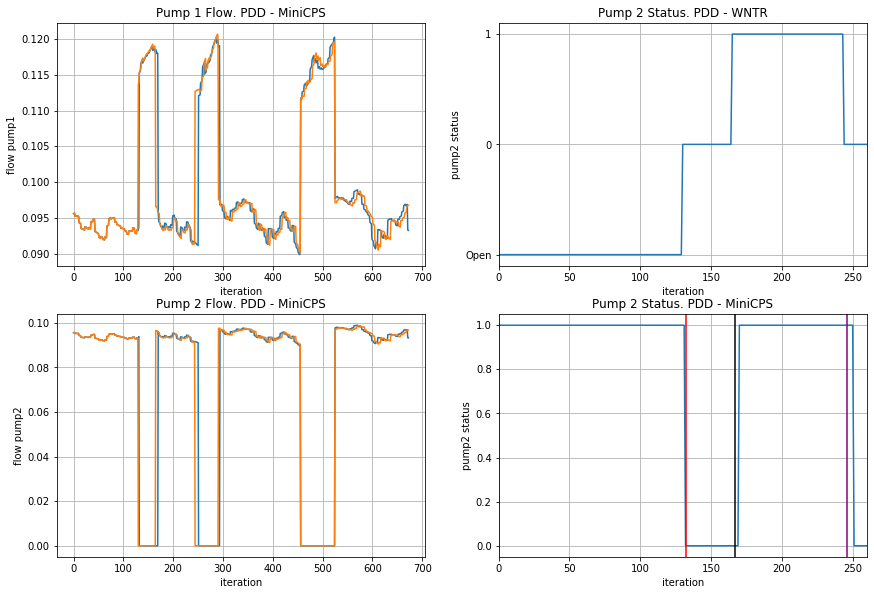

In [53]:
fp1 = pressure_driven_no_attack['FLOW_PUMP1']
fp2 = pressure_driven_no_attack['FLOW_PUMP2']
sp1 = pressure_driven_no_attack['STATUS_PUMP1']
sp2 = pressure_driven_no_attack['STATUS_PUMP2']

wntr_fp1 = no_minicps_data['FLOW_PUMP1']
wntr_fp2 = no_minicps_data['FLOW_PUMP2']
wntr_sp1 = no_minicps_data['STATUS_PUMP1']
wntr_sp2 = no_minicps_data['STATUS_PUMP2']


plt.subplot(421)
plt.plot(fp1)
plt.plot(wntr_fp1)
plt.xlabel('iteration')
plt.ylabel('flow pump1')
plt.title('Pump 1 Flow. PDD - MiniCPS')
plt.grid(True)

plt.subplot(423)
plt.plot(fp2)
plt.plot(wntr_fp2)
plt.xlabel('iteration')
plt.ylabel('flow pump2')
plt.title('Pump 2 Flow. PDD - MiniCPS')
plt.grid(True)

plt.subplot(422)
plt.plot(wntr_sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.xlim(left=0, right= 260)
plt.title('Pump 2 Status. PDD - WNTR')
plt.grid(True)


plt.subplot(424)
plt.plot(sp2)
plt.xlabel('iteration')
plt.ylabel('pump2 status')
plt.axvline(x=132, color="red")
plt.axvline(x=167, color="black")
plt.axvline(x=246, color="purple")
plt.xlim(left=0, right= 260)
plt.title('Pump 2 Status. PDD - MiniCPS')
plt.grid(True)

plt.subplots_adjust(top=4.00, right=2.00)
plt.show()

The behavior of the pumps is very similar, with small differences. The pump 2 changes its state 1 iteration in MiniCPS

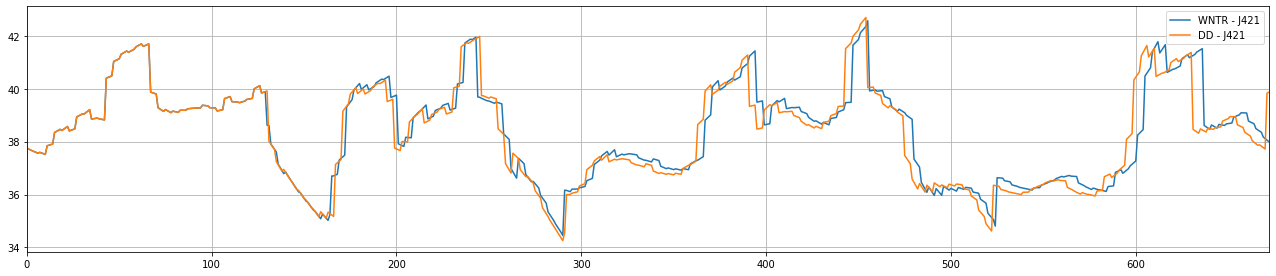

In [54]:
junctions = plt.subplot(2,1,1)
no_minicps_data["J421"].plot(label='WNTR - J421', ax=junctions)
demand_driven_no_attack["J421"].plot(label='DD - J421', ax=junctions)
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)


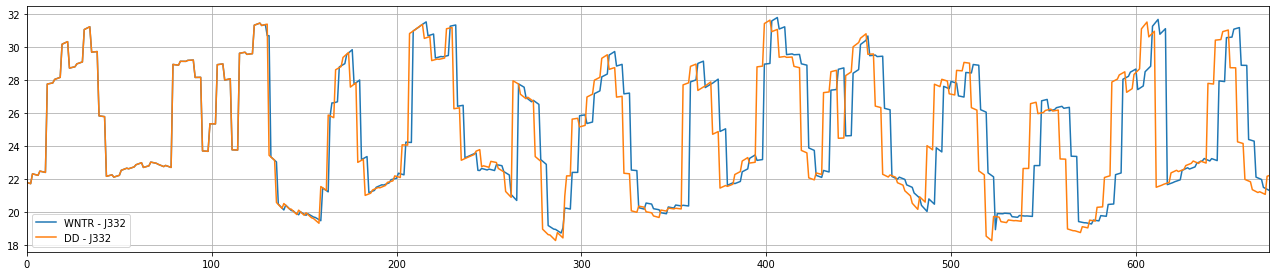

In [55]:
junctions = plt.subplot(2,1,1)
no_minicps_data["J332"].plot(label='WNTR - J332', ax=junctions)
demand_driven_no_attack["J332"].plot(label='DD - J332', ax=junctions)
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

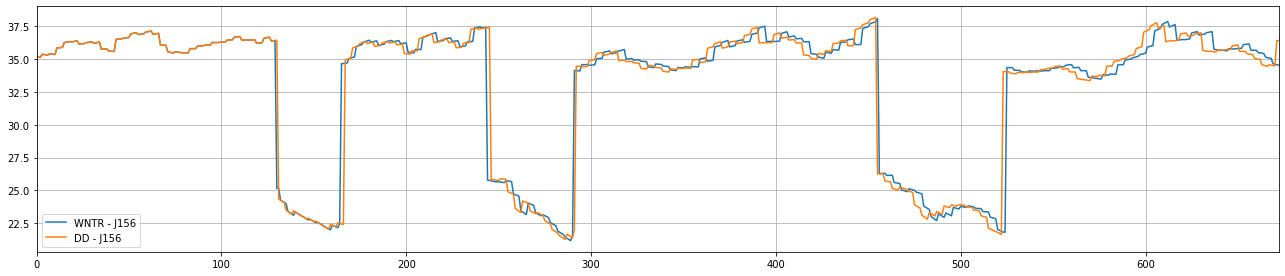

In [56]:
junctions = plt.subplot(2,1,1)
no_minicps_data["J156"].plot(label='WNTR - J156', ax=junctions)
demand_driven_no_attack["J156"].plot(label='DD - J156', ax=junctions)
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

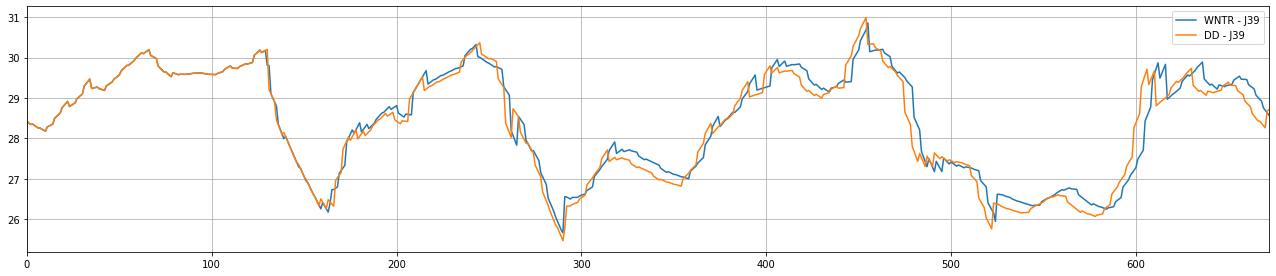

In [57]:
junctions = plt.subplot(2,1,1)
no_minicps_data["J39"].plot(label='WNTR - J39', ax=junctions)
demand_driven_no_attack["J39"].plot(label='DD - J39', ax=junctions)
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

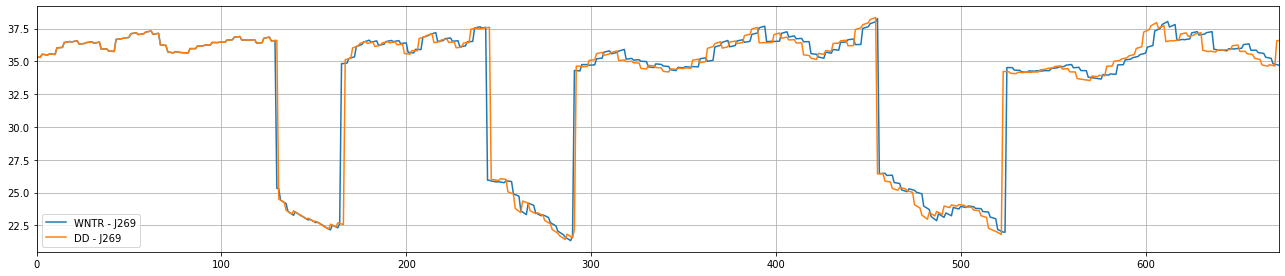

In [58]:
junctions = plt.subplot(2,1,1)
no_minicps_data["J269"].plot(label='WNTR - J269', ax=junctions)
demand_driven_no_attack["J269"].plot(label='DD - J269', ax=junctions)
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

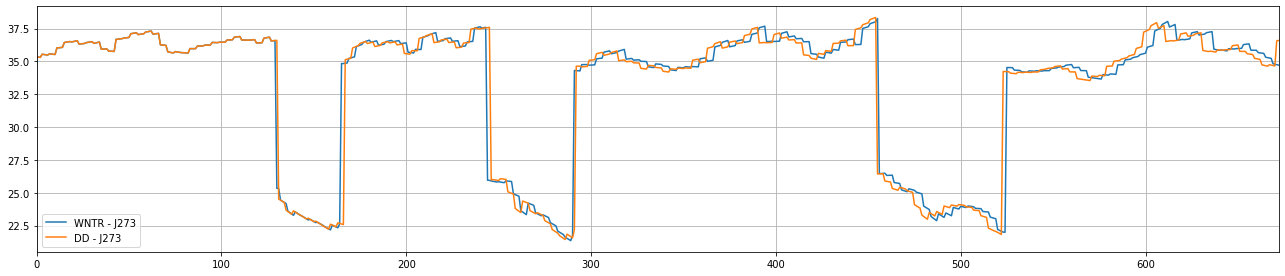

In [59]:
junctions = plt.subplot(2,1,1)
no_minicps_data["J273"].plot(label='WNTR - J273', ax=junctions)
demand_driven_no_attack["J273"].plot(label='DD - J273', ax=junctions)
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

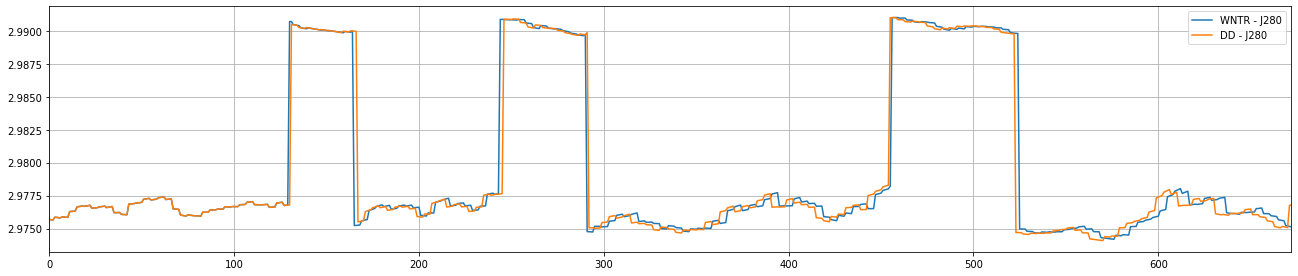

In [61]:
junctions = plt.subplot(2,1,1)
no_minicps_data["J280"].plot(label='WNTR - J280', ax=junctions)
demand_driven_no_attack["J280"].plot(label='DD - J280', ax=junctions)
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

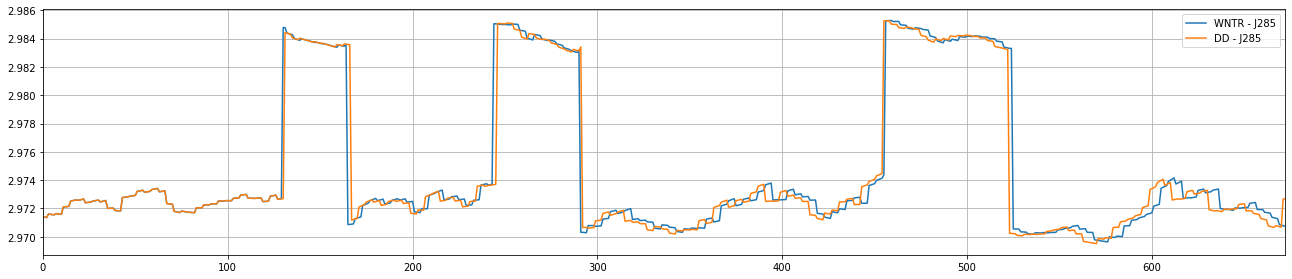

In [62]:
junctions = plt.subplot(2,1,1)
no_minicps_data["J285"].plot(label='WNTR - J285', ax=junctions)
demand_driven_no_attack["J285"].plot(label='DD - J285', ax=junctions)
plt.legend()
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

## Testing with Minitown and Low Demand

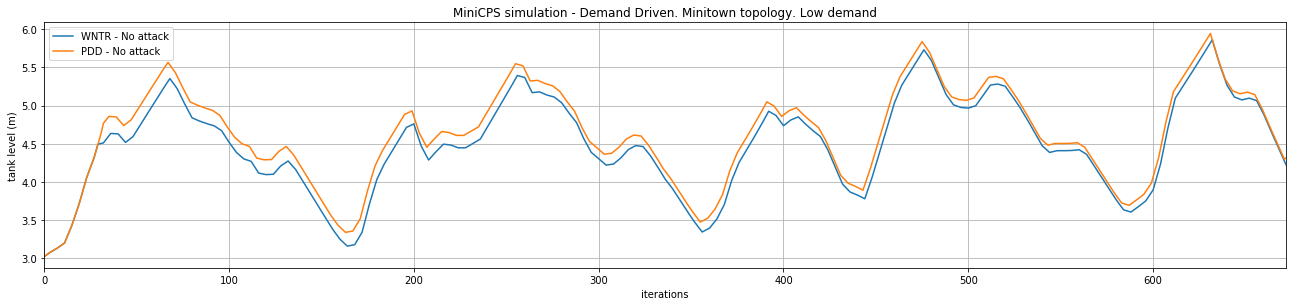

In [67]:
no_minicps_data_low_demand = pd.read_csv('no_minicps_pdd_low_demand.csv')
pressure_driven_no_attack_low_demand = pd.read_csv('experiment_data/pressure_driven/no_attack/low_demand/physical_process.csv')
dd = plt.subplot(2,1,1)
no_minicps_data_low_demand["TANK_LEVEL"].plot(label='WNTR - No attack', ax=dd)
pressure_driven_no_attack_low_demand["TANK_LEVEL"].plot(label='PDD - No attack', ax=dd)
plt.title("MiniCPS simulation - Demand Driven. Minitown topology. Low demand")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

## Testing with PLC1 on full control 

One Week PD. PLC1 Control: Mean: 0.11861087749329552+/-0.13084395625607673


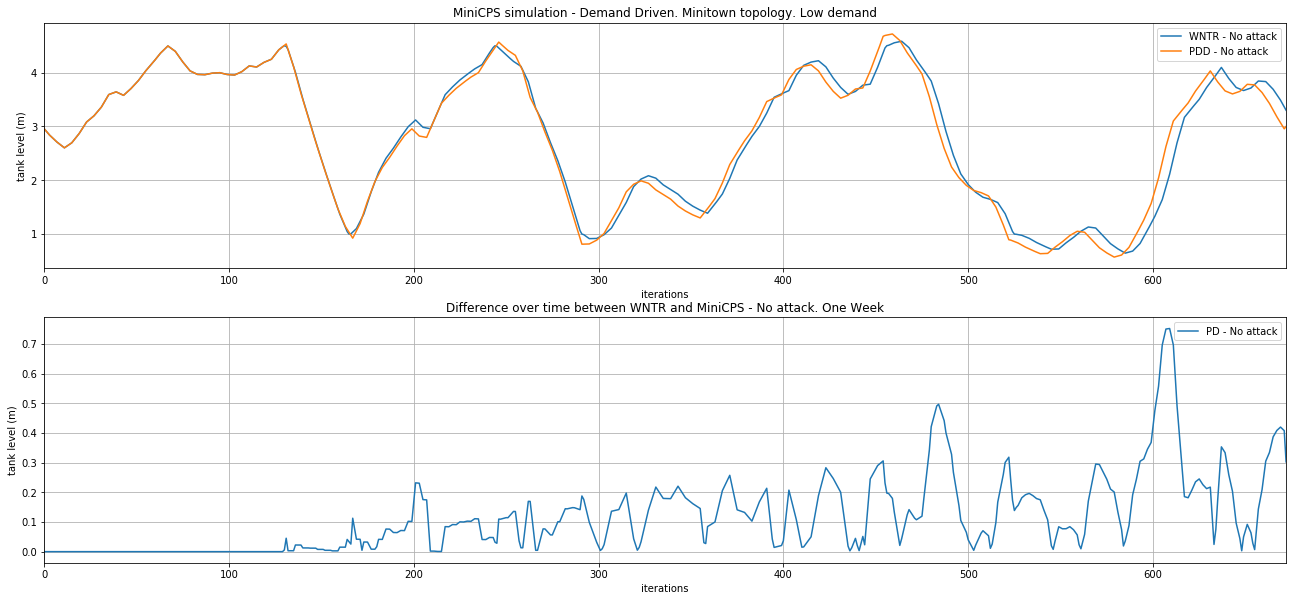

In [83]:
pressure_driven_no_attack_plc1 = pd.read_csv('experiment_data/pressure_driven/no_attack/plc1_full_control/physical_process.csv')
dd = plt.subplot(2,1,1)
no_minicps_data["TANK_LEVEL"].plot(label='WNTR - No attack', ax=dd)
pressure_driven_no_attack_plc1["TANK_LEVEL"].plot(label='PDD - No attack', ax=dd)
plt.title("MiniCPS simulation - Demand Driven. Minitown topology. Low demand")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

pressure_driven_no_attack_plc1_diff = []
for i in range((len(no_minicps_data['TANK_LEVEL']))):
    pressure_driven_no_attack_plc1_diff.append(abs ( no_minicps_data['TANK_LEVEL'][i] - pressure_driven_no_attack_plc1['TANK_LEVEL'][i]  ) )

    
dd = plt.subplot(2,1,2)
plt.plot(pressure_driven_no_attack_plc1_diff, label="PD - No attack")
plt.title("Difference over time between WNTR and MiniCPS - No attack. One Week")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.xlim(left=0, right=672)
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)


plc1_pressure_one_week_mean = statistics.mean(pressure_driven_no_attack_plc1_diff)
plc1_pressure_one_week_std = statistics.stdev(pressure_driven_no_attack_plc1_diff)

print("One Week PD. PLC1 Control: Mean: " + str(plc1_pressure_one_week_mean) + "+/-" + str(plc1_pressure_one_week_std))

## PLC1 Thread

One Week PD. PLC1 Control: Mean: 0.14722303112798368+/-0.13312908982642624


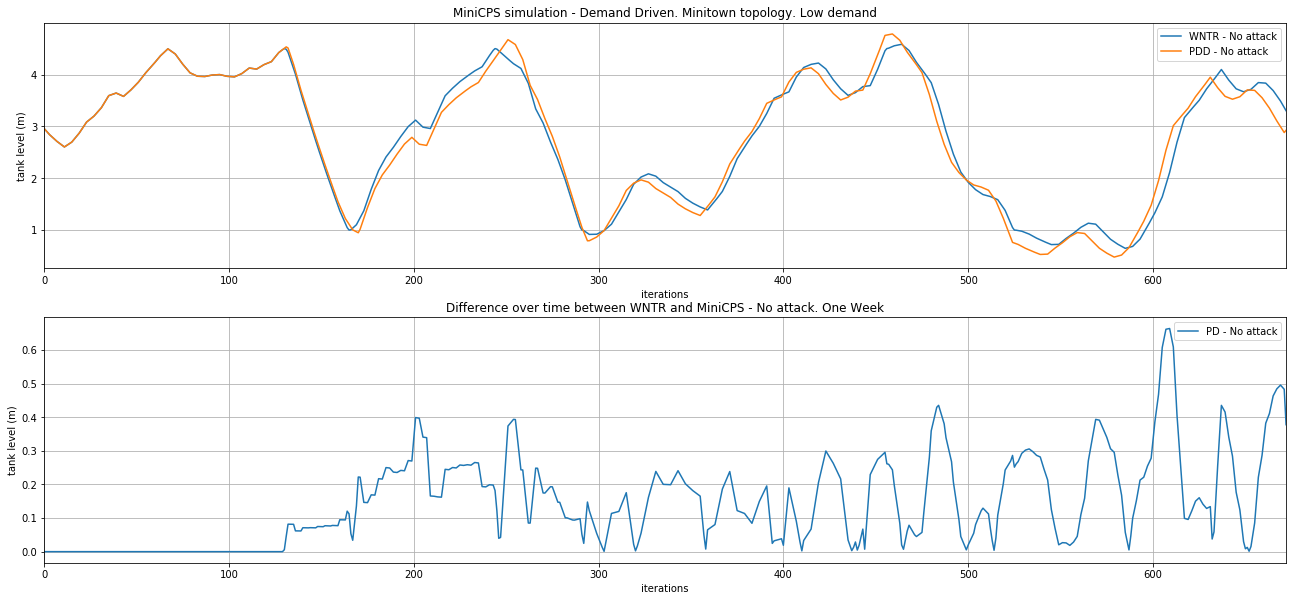

In [82]:
pressure_driven_thread_on_get = pd.read_csv('experiment_data/pressure_driven/no_attack/thread_on_get/physical_process.csv')
dd = plt.subplot(2,1,1)
no_minicps_data["TANK_LEVEL"].plot(label='WNTR - No attack', ax=dd)
pressure_driven_thread_on_get["TANK_LEVEL"].plot(label='PDD - No attack', ax=dd)
plt.title("MiniCPS simulation - Demand Driven. Minitown topology. Low demand")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.subplots_adjust(top=2.00, right=3.00)
plt.grid(True)

pressure_driven_thread_on_get_diff = []
for i in range((len(no_minicps_data['TANK_LEVEL']))):
    pressure_driven_thread_on_get_diff.append(abs ( no_minicps_data['TANK_LEVEL'][i] - pressure_driven_thread_on_get['TANK_LEVEL'][i]  ) )
    
dd = plt.subplot(2,1,2)
plt.plot(pressure_driven_thread_on_get_diff, label="PD - No attack")
plt.title("Difference over time between WNTR and MiniCPS - No attack. One Week")
plt.legend()
plt.xlabel('iterations')
plt.ylabel('tank level (m)')
plt.xlim(left=0, right=672)
# plt.subplots_adjust(top=2.00, right=3.0)
plt.grid(True)


pressure_driven_thread_on_get_mean = statistics.mean(pressure_driven_thread_on_get_diff)
pressure_driven_thread_on_get_std = statistics.stdev(pressure_driven_thread_on_get_diff)

print("One Week PD. PLC1 Control: Mean: " + str(pressure_driven_thread_on_get_mean) + "+/-" + str(pressure_driven_thread_on_get_std))